# Project: Let's get real-estate!

## Authors | NetID
* Arpan Sutaria | asutar5@uic.edu
* Devesh Patel | dpate320@uic.edu
* Htin Linn Htoo Than | hthan2@uic.edu
* Jay Patel | jpate281@uic.edu
* Kevinkumar Patel | kpate413@uic.edu

## GitHub Link:
https://github.com/A-Sutaria/CS418_Project_FA23

# Project Introduction

This project is more focused towards analyzing the real estate market and figuring out the trends and patterns throughout history. We start by looking the data overall and analyzing it through EDA. Then we came up with our hypothesis that were based off on trends that we see in real world. We used the obtained data to prove or disprove our hypothesis through visualizations. Lastly, we have two machine learning models. One is a predicting model which predicts the value indices of properties. The other is a classifying model that classifies a region's market as hot, stable or cold. This project is essentially brought up with the idea that what kind of things would a property manager look at or consider before getting into the market. Or, what kind of insights would help an existing property manager to make more sound decisions.

# Any changes since the proposal
Yes, a large one. Initially we were planning to do a data science project that analyzed the traffic patterns on Chicago's freeways. The end goal would be to predict at what time should one leave to get to their destination on time with the least amount of time spent in traffic. Since our goal was too specific, it was very hard to find data that fit our idea. Eventually we had to gave up this idea, not because it was a bad one, but because there was no data that we could base our project on.

Then we came up with the idea of diving into the real-estate world as that was a common theme among most team members. We all agreed on this idea, and we asked ourselves questions like what do we wanna know about the real-estate market, what insights would a property manager find valuable, etc. This was the foundation of the current idea.

# Data - Htin Linn

Our main source of data is Zillow's public dataset available here: https://www.zillow.com/research/data/. There's a lot of data available, more than we need for the scope of this project. Each dataset is an attribute of feature of the property. Some of the major ones we are using are: Zillow Home Value Index (ZHVF), Zillow Home Value Forecast (ZHVF), Days To Pending, Inventory levels, etc.

All of the data is quantitative. As I mentioned earlier, each dataset is a feature in its own. All the datasets are indexed by regionID where regionID can correspond to one of either a metro city, a neighborhood, a ZIP code, a state, etc. For most of the cases, we are using datasets over metro cities. All the datasets are divided over time ranging from 01/31/2000 to 09/30/2023. Most of the data is divided on a monthly basis. Given a name and a date, you can figure out the value (according to the dataset, eg: ZHVI, ZHVF, etc.). 

# Exploratory Data Analysis (EDA) - ALL
The datasets we used for this project mainly consists of numerical values which are prices of different homes over a period of time and variables which are different regions and states. Since our main focus is to compare prices across different variables over a different period of time, we had to make sure our datasets included exactly the type of data we needed and we needed to clean to filter out any missing values.


The 6 main different datasets are The Zillow Home Value Index (ZHVI), the Zillow Home Value Forecast (ZHVF), the Zillow Observed Rent Index (ZORI), For-Sale Inventory, List and Sale Prices, Sales Count, and Price Cuts. Each dataset is also divided into multiple data types across different geography values such as Metro & U.S, State, County, City, Zip Code and Neighbourhood. However, the issue we faced was that not all datasets have the each of the geography value except for Metro & U.S so we decided to mainly use the datasets which have the Metro & U.S values.

We would be plotting 5 graphs of 5 datasets (out of many) that we used. All 5 datasets have the same arrangement. They have the following columns:
* RegionID: ID of the region (region can be metro/neighborhood/ZIP region/etc) they have data about
* SizeRank: Rank of the area they have data about. All the datasets are sorted by the rank in ascending order.
* RegionName: Name of the region (region can metro/neighborhood/ZIP region/etc).
* RegionType: Type of region (region can metro/neighborhood/ZIP region/etc). For example, metro cities have the value "msa", while ZIP regions have the value "ZIP"; states have the value "state", and so on.
* StateName: Shortform of the state name. NOTE: If RegionType = state, then this column would be empty.
* DATES**: This is not a single column but multiple columns. These columns are dates in the format yyyy-mm-dd. The values for these columns is the actual value the dataset is comprised off.

For all the graphs, we are plotting the first entry which is the cumulative of whichever attribute the dataset corresponds to over entire U.S. For example, if it is the ZHVI dataset, then the first value (which always is United States) would be plotted against time to see the trend in the entire US. For a specific region, we would have to find the entry with that specific region (can use pandasql) and then plot it.

In [1]:
# a helper function used across all the EDAs
def get_x_y(dataframe):
    first_row = dataframe.iloc[0]
    x_row = first_row.index[5:].to_numpy()
    y_row = first_row.iloc[5:].to_numpy()

    return [x_row, y_row]

## EDA 1: Zillow Home Value Index (ZHVI)
### (Arpan)
Zillow Home Value Index (ZHVI): A measure of the typical home value and market changes across a given region and housing type. It reflects the typical value for homes in the 35th to 65th percentile range. Available as a smoothed, seasonally adjusted measure and as a raw measure. We used the smoothed version of data. This is a quantitative data spread across time ranging from 01/31/2000 to 09/30/2023. For any given month, you can check up the value index of a given metro city.

Here is the code to generate a plot of the overall ZHVI of properties across the U.S

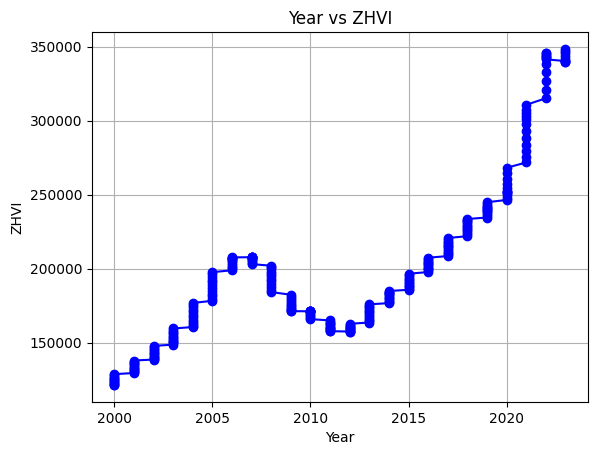

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# The dataset
zhvi_trends = pd.read_csv("datasets\Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")

# Getting the X and Y values that will be plotted
[x_zhvi, y_zhvi] = get_x_y(zhvi_trends)

# Extract years from X
years = [datetime.strptime(date, '%Y-%m-%d').year for date in x_zhvi]

# Plot the line chart
plt.plot(years, y_zhvi, marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('ZHVI')
plt.title('Year vs ZHVI')
plt.grid(True)
plt.show()

As you can see in the graph, the trend of ZHVI is progressively growing indicating that the value index of properties across U.S have continued to rise. This can also imply there was a significant increase in the price of the properties.

## EDA 2: For-Sale Inventory
### (Devesh)
The count of unique listings that were active at any time in a given month. This data is again a quantitative data spread across 03/31/2018 to 09/30/2023. For a given metro city, at any given month, this data can give how many properties were listed for sale during that month in that region.

Here is plot of inventories across the U.S for all available times.

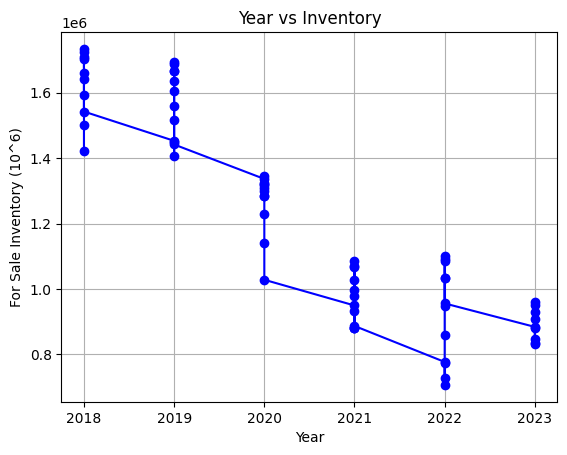

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# The dataset
fs_inventory_trends = pd.read_csv("datasets\Metro_invt_fs_uc_sfrcondo_sm_month.csv")

# Getting the X and Y values that will be plotted
[x_fs, y_fs] = get_x_y(fs_inventory_trends)

# Extract years from X
years = [datetime.strptime(date, '%Y-%m-%d').year for date in x_fs]

# Plot the line chart
plt.plot(years, y_fs, marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('For Sale Inventory (10^6)')
plt.title('Year vs Inventory')
plt.grid(True)
plt.show()

As we can observe, the inventory levels went down progressively. This tells us the there was a decrease in the sales of properties. Practically, we still see people living and population of cities increasing. We can easily infer that there has been a shift from sales of properties to rental properties.

## EDA 3: Zillow Observed Rent Index (ZORI)
### (Htin Linn)
Zillow Observed Rent Index (ZORI): A smoothed measure of the typical observed market rate rent across a given region. ZORI is a repeat-rent index that is weighted to the rental housing stock to ensure representativeness across the entire market, not just those homes currently listed for-rent. The index is dollar-denominated by computing the mean of listed rents that fall into the 40th to 60th percentile range for all homes and apartments in a given region, which is once again weighted to reflect the rental housing stock. This quantitative data also follows the same format as the previous datasets. The range for this dataset is from 01/31/2015 to 09/30/2023.

Here is a plot of ZORI across U.S for all available times:

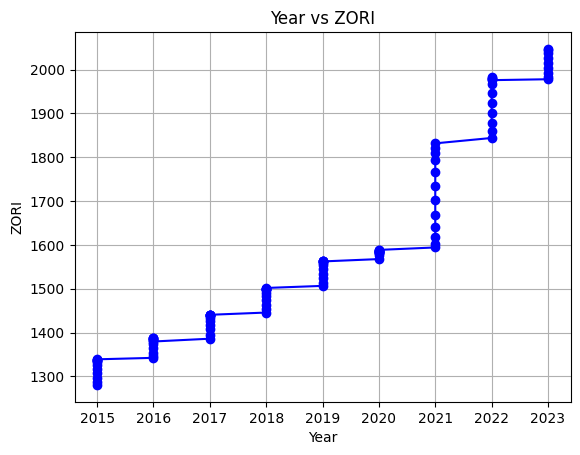

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# The dataset
zori_trends = pd.read_csv("datasets\Metro_zori_sm_month.csv")

# Getting the X and Y values that will be plotted
[x_zori, y_zori] = get_x_y(zori_trends)

# Extract years from X
years = [datetime.strptime(date, '%Y-%m-%d').year for date in x_zori]

# Plot the line chart
plt.plot(years, y_zori, marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('ZORI')
plt.title('Year vs ZORI')
plt.grid(True)
plt.show()

As we can see, the ZORI has rised overall and that too drastically. One other interesting thing is that it resembles a staircase pattern of rising which means, the changes were sudden. What caused the spikes can be its own study. But one thing we can infer for sure is that there was definitely rise in rental properties which in turn resulted in a higher value index for rental properties.

## EDA 4: Days to Close (Mean)
### (Jay)
Days to Close: Number of days between the listing going pending and the sale date. This quantitative data is ranged across 01/31/2018 to 08/31/2023.

Here is the plot of Days to Close across U.S for the given range of time:

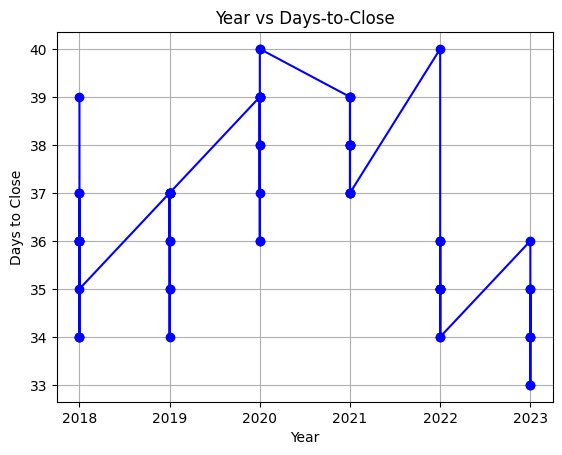

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# The dataset
days_to_close = pd.read_csv("datasets\Metro_mean_days_to_close_uc_sfrcondo_month.csv")

# Getting the X and Y values that will be plotted
[x_dtc, y_dtc] = get_x_y(days_to_close)

# Extract years from X
years = [datetime.strptime(date, '%Y-%m-%d').year for date in x_dtc]

# Plot the line chart
plt.plot(years, y_dtc, marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('Days to Close')
plt.title('Year vs Days-to-Close')
plt.grid(True)
plt.show()

In the graph, we can see that there is no specific pattern. But by looking at Y axis, we can infer that usually it takes approx. 30-40 days for a property to close. We see more values around 37 over the years which might make it the avg number of days it takes for a property to close.

## EDA 5: Sales-to-List Ratio (Mean/Median)
### (Kevin)
Sale-to-List Ratio (mean/median): Ratio of sale vs. final list price. This also is a quantitative data ranging from 01/31/2018 to 08/31/2023 for mean and median both. This might tell us whether there was a change in the negiotiation frame or how frequent it might have become.

Here are two plots (mean and median) to observe those trends.

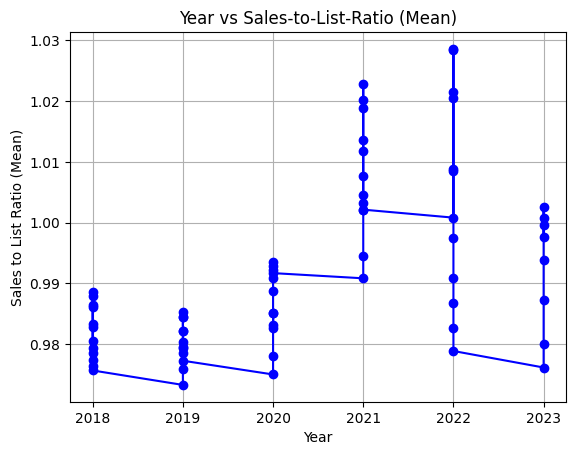

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# The dataset
sale_to_list_ratio_mean = pd.read_csv("datasets\Metro_mean_sale_to_list_uc_sfrcondo_month.csv")

# Getting the X and Y values that will be plotted
[x_stlr_mean, y_stlr_mean] = get_x_y(sale_to_list_ratio_mean)

# Extract years from X
years = [datetime.strptime(date, '%Y-%m-%d').year for date in x_stlr_mean]

# Plot the line chart
plt.plot(years, y_stlr_mean, marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('Sales to List Ratio (Mean)')
plt.title('Year vs Sales-to-List-Ratio (Mean)')
plt.grid(True)
plt.show()

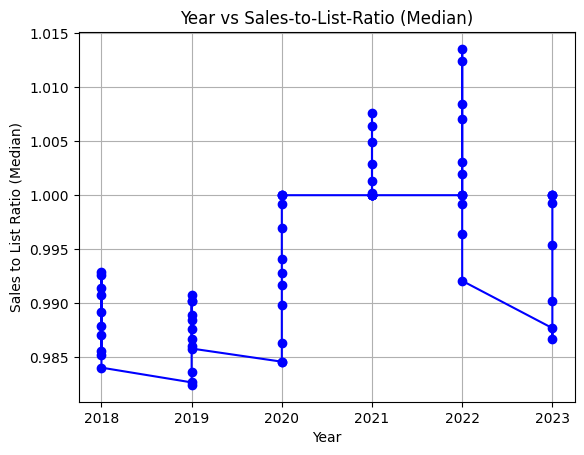

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# The dataset
sale_to_list_ratio_median = pd.read_csv("datasets\Metro_median_sale_to_list_uc_sfrcondo_sm_month.csv")

# Getting the X and Y values that will be plotted
[x_stlr_median, y_stlr_median] = get_x_y(sale_to_list_ratio_median)

# Extract years from X
years = [datetime.strptime(date, '%Y-%m-%d').year for date in x_stlr_median]

# Plot the line chart
plt.plot(years, y_stlr_median, marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('Sales to List Ratio (Median)')
plt.title('Year vs Sales-to-List-Ratio (Median)')
plt.grid(True)
plt.show()

Both of the graphs almost look similar, except for the time period 2020-2022. Mean suggests a higher Sales-to-List-Ratio for the year 2021. It might imply there were outliers. Less of the differences, more on the trends; we can see that there's not as such a visible pattern. There was a time period when sales-to-list ratio was high, but as of now it has again dropped.

# Visualization (Needed at least 5)

## Visualization 1 (Arpan)

### Hypothesis
There is a co-relation between schools and home values in a given area.

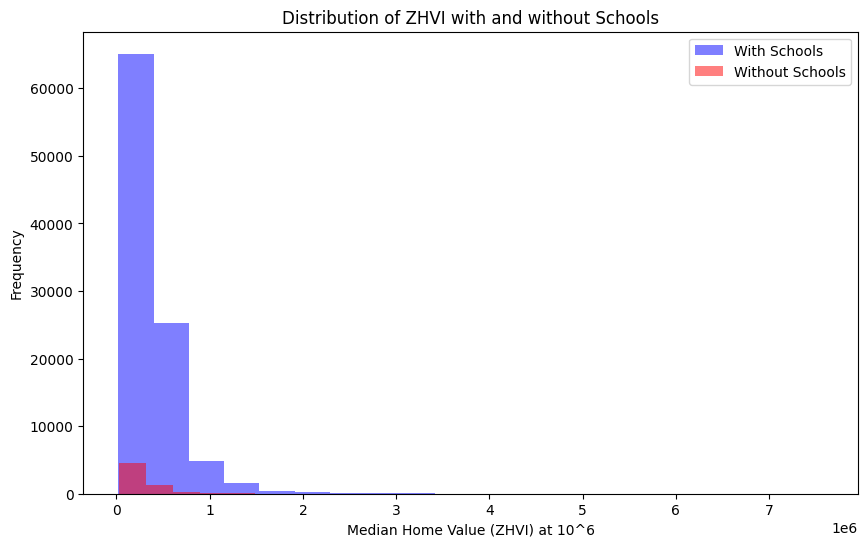

In [8]:
# in case you don't have this library installed
# %pip install openpyxl

import pandas as pd
import matplotlib.pyplot as plt

# Load ZHVI data
zhvi_data = pd.read_csv("datasets\Zip_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")
zhvi_data = zhvi_data.drop('SizeRank', axis=1)
zhvi_data = zhvi_data.drop('StateName', axis=1)
zhvi_data = zhvi_data.rename(columns={'RegionName': 'ZIP'})  # Rename the 'RegionName' column to 'ZIP' in zhvi_data

# Load school data
school_data = pd.read_excel("datasets\EDGE_GEOCODE_PUBLICSCH_2122.xlsx")

# Creating two groups so that we can compare them on the graph and prove/disprove our hypothesis
zhvi_with_schools = zhvi_data.merge(
    school_data[['ZIP', 'STATE', 'NAME']],
    on='ZIP',
    how='inner'
)

# Create 'zhvi_without_schools' dataframe
zhvi_without_schools = zhvi_data[~zhvi_data['ZIP'].isin(school_data['ZIP'])]

# Select the columns of interest for both dataframes
columns_of_interest = [
    'RegionID', 'ZIP', 'State', 'City', 'Metro', 'CountyName', '2023-09-30'
]

zhvi_with_schools = zhvi_with_schools[columns_of_interest + ['NAME']]  # adding name of the schools for more clarity
zhvi_without_schools = zhvi_without_schools[columns_of_interest]

plt.figure(figsize=(10, 6))
plt.hist(zhvi_with_schools['2023-09-30'], bins=20, alpha=0.5, color='blue', label='With Schools')
plt.hist(zhvi_without_schools['2023-09-30'], bins=20, alpha=0.5, color='red', label='Without Schools')
plt.xlabel('Median Home Value (ZHVI) at 10^6')
plt.ylabel('Frequency')
plt.title('Distribution of ZHVI with and without Schools')
plt.legend()
plt.show()

### Explanation
If we look at the Bar chart plot, it is very obvious that there is a huge difference between the two groups: Houses with schools in the same neighborhood (ZIP Code), and Houses without schools in the same neighborhood (ZIP Code). It is observed that houses in the same ZIP Code region as a school had dramatically high Zillow Home Value Index (ZHVI) as of 09/30/2023 than those of houses in a ZIP Code region with no schools. This proves my hypothesis that there is a co-relation between houses and schools. The conclusion is that houses with schools nearby have a higher ZHVI. 

## Visualization 2 (Devesh)
### Hypothesis
There is a correlation between ZHVI and ZORI, suggesting that home values influence rental prices?

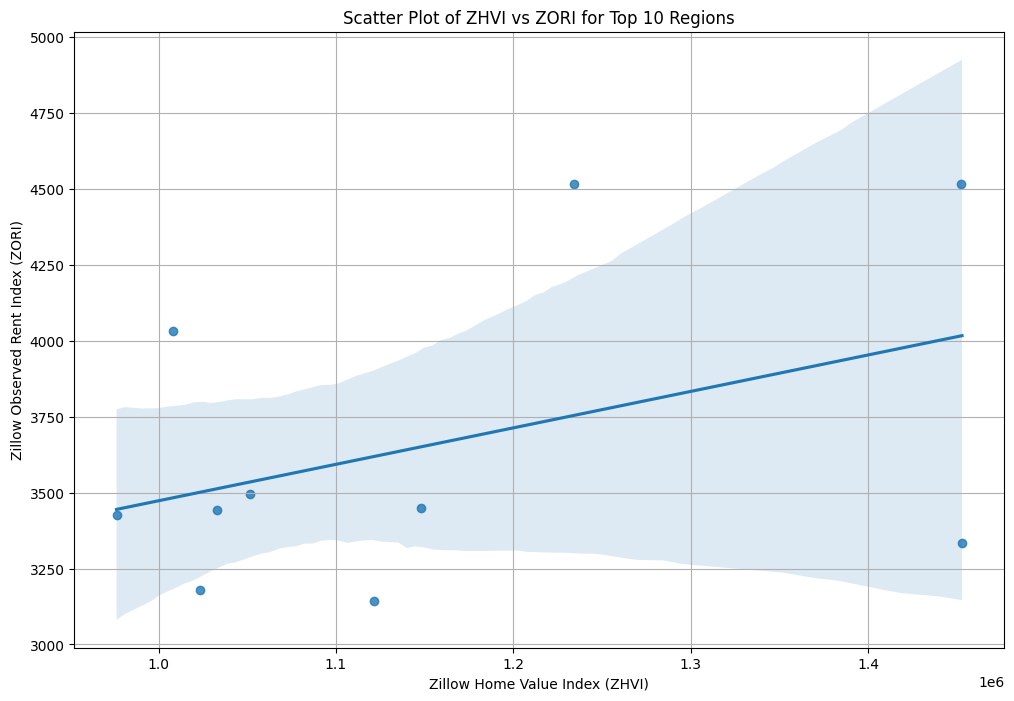

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

zhvi_data = pd.read_csv("datasets\Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")
zori_data = pd.read_csv("datasets\Metro_zori_sm_month.csv")

# For simplicity, we'll focus on the most recent month's data for both indices, which is September 2023.
# Extract the most recent ZHVI and ZORI values for each region
zhvi_latest = zhvi_data[['RegionName', '2023-09-30']].rename(columns={'2023-09-30': 'ZHVI'})
zori_latest = zori_data[['RegionName', '2023-09-30']].rename(columns={'2023-09-30': 'ZORI'})

# Merge the datasets on the RegionName field
combined_zhvi_zori = pd.merge(zhvi_latest, zori_latest, on='RegionName')

# Calculate the correlation between ZHVI and ZORI for the merged data
correlation = combined_zhvi_zori[['ZHVI', 'ZORI']].corr()

# We will plot only the top 10 most populous regions for clarity in the visualization
top_regions = combined_zhvi_zori.nlargest(10, 'ZHVI')

# Create scatter plot
plt.figure(figsize=(12, 8))
sns.regplot(x='ZHVI', y='ZORI', data=top_regions)

plt.title('Scatter Plot of ZHVI vs ZORI for Top 10 Regions')
plt.xlabel('Zillow Home Value Index (ZHVI)')
plt.ylabel('Zillow Observed Rent Index (ZORI)')
plt.grid(True)
plt.show()

### Explanation
The scatter plot with a trend line for the top 10 regions by home value index (ZHVI) has been created, showing a strong positive correlation between the Zillow Home Value Index (ZHVI) and the Zillow Observed Rent Index (ZORI) with a correlation coefficient of approximately 0.88. This suggests a significant relationship where, generally, as home values increase, rental prices also tend to increase in these regions.​​

## Visualization 3 (Htin Linn)
### Hypothesis
Listings that undergo a price cut stay on the market longer and have a lower Sale-to-List Ratio, suggesting that initial pricing is crucial for a quick sale.

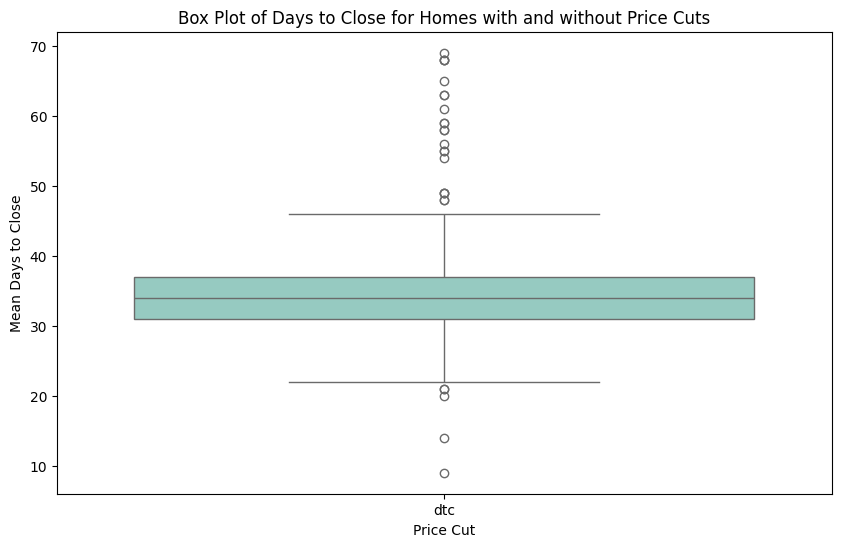

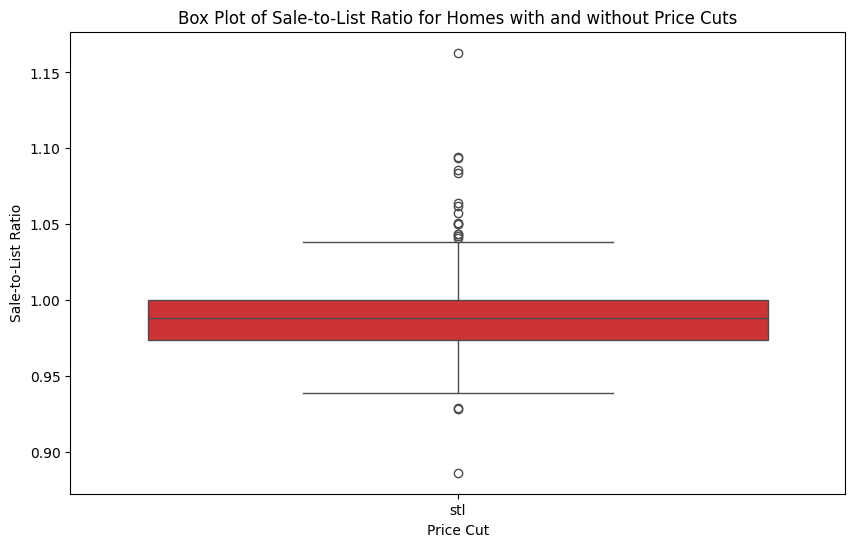

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Data
daystoclose = pd.read_csv('datasets\Metro_mean_days_to_close_uc_sfrcondo_month.csv')
saletolist = pd.read_csv('datasets\Metro_mean_sale_to_list_uc_sfrcondo_month.csv')

# Most Recent Data
dtc_latest = daystoclose[['RegionName', '2023-08-31']].rename(columns={'2023-08-31': 'dtc'})
stl_latest = saletolist[['RegionName', '2023-08-31']].rename(columns={'2023-08-31': 'stl'})

# Box plots
plt.figure(figsize=(10, 6))  
sns.boxplot(data=dtc_latest, palette="Set3")
plt.title("Box Plot of Days to Close for Homes with and without Price Cuts")
plt.xlabel("Price Cut")
plt.ylabel("Mean Days to Close")
plt.show()

plt.figure(figsize=(10, 6))  
sns.boxplot(data=stl_latest, palette="Set1")
plt.title("Box Plot of Sale-to-List Ratio for Homes with and without Price Cuts")
plt.xlabel("Price Cut")
plt.ylabel("Sale-to-List Ratio")
plt.show()

### Explanation
The first box plot compares 'Days to Close' for homes with and without price cuts, while the second one compares the 'Sale-to-List Ratio' for the same groups. As we can see from the box plots, most of the listings that undergo a price cut stay on the market longer and have a lower Sale-to-List Ratio, suggesting that initial pricing is crucial for a quick sale.

## Visualization 4 (Jay)
### Hypothesis
Do ZHVI and for-sale inventory levels exhibit seasonal patterns, and if so, how do they vary by region and housing tier?

C:\Users\Arpan\AppData\Local\Temp\ipykernel_38940\811043436.py:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_data_first_five['Date'] = pd.to_datetime(merged_data_first_five['Date'], errors='coerce')


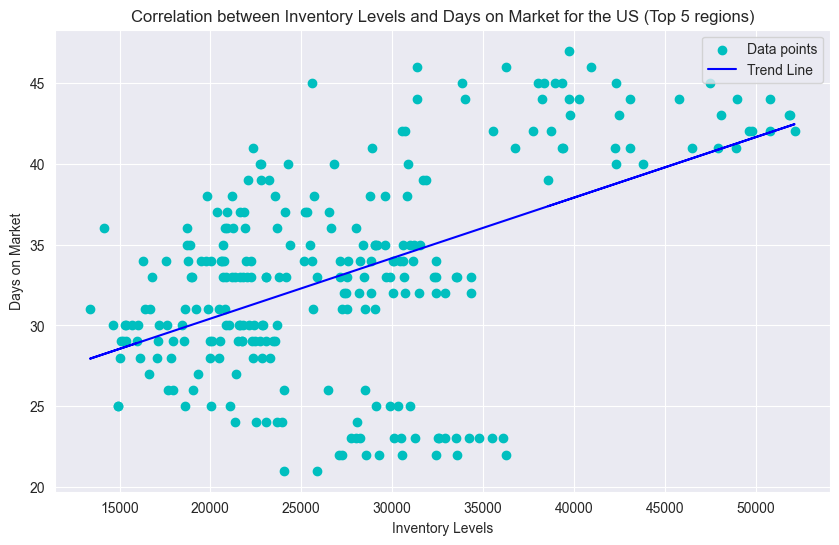

In [11]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

# Loading the CSV file into a Pandas DataFrame
inventory = pd.read_csv("datasets\Metro_invt_fs_uc_sfrcondo_sm_month.csv")
days_pending = pd.read_csv("datasets\Metro_mean_days_to_close_uc_sfrcondo_month.csv")

# Melt the datasets to convert them from wide to long format
inventory_melted = inventory.melt(id_vars=['RegionID', 'RegionName'], var_name='Date', value_name='Inventory')
days_on_market_melted = days_pending.melt(id_vars=['RegionID', 'RegionName'], var_name='Date', value_name='DaysOnMarket')
first_five_regions = inventory['RegionName'][2:6].tolist()

inventory_first_five = inventory_melted[inventory_melted['RegionName'].isin(first_five_regions)]
days_on_market_first_five = days_on_market_melted[days_on_market_melted['RegionName'].isin(first_five_regions)]
merged_data_first_five = pd.merge(inventory_first_five, days_on_market_first_five, on=['RegionName', 'Date'])

# Convert 'Date' to datetime and sort the data
merged_data_first_five['Date'] = pd.to_datetime(merged_data_first_five['Date'], errors='coerce')

merged_data_first_five = merged_data_first_five.dropna(subset=['Date']).sort_values(['RegionName', 'Date'])
merged_data_first_five.dropna(subset=['Inventory', 'DaysOnMarket'], inplace=True)

# Set style
sns.set_style("darkgrid")

X = merged_data_first_five['Inventory'].values.reshape(-1, 1)
Y = merged_data_first_five['DaysOnMarket'].values

# linear regression model
model = LinearRegression()
model.fit(X, Y)

# values for the trend line
trend_line = model.predict(X)

# scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='c', label='Data points')
plt.plot(X, trend_line, color='blue', label='Trend Line')
plt.title('Correlation between Inventory Levels and Days on Market for the US (Top 5 regions)')
plt.xlabel('Inventory Levels')
plt.ylabel('Days on Market')
plt.legend()
plt.show()

### Explanation
There are two CSV files used for this visualization, Inventory.csv and days_pending.csv. The data from both CSV files is transformed from a wide format to a long format using the melt method. This restructuring makes it easier to manipulate and analyze the data. The code filters out the data for the top five regions in the inventory dataset. It then merges these filtered datasets on the basis of region names and dates, creating a combined dataset that does a comparative analysis between inventory levels and days on the market for these specific regions. The 'Date' column is converted to a datetime format. Any rows with missing values in the 'Date', 'Inventory', or 'DaysOnMarket' columns are dropped. A seaborn style setting is applied just for getting the grid for the plot. The inventory and days on market data are prepared for plotting and regression analysis. A linear regression model is fitted to the data to understand the relationship between inventory levels and the days on market. The code then predicts values for a trend line based on this model, which will be plotted alongside the actual data points. A scatter plot is created to visualize the relationship between the inventory levels and the days on the market for these regions. The trend line from the linear regression analysis is also plotted to illustrate the general direction of the relationship.

We found out that the correlation is positive which suggests that it has been a hot market in the top 5 regions of the United States from 2018 to present. Both low inventory and quick sales could occur simultaneously, indicating high demand and a fast-moving market.

## Visualization 5 (Kevin)
### Hypothesis
The 4 bedroom home values are growing at a faster rate than the home values with lesser bedrooms, indicating an increasing disparity in the housing market.

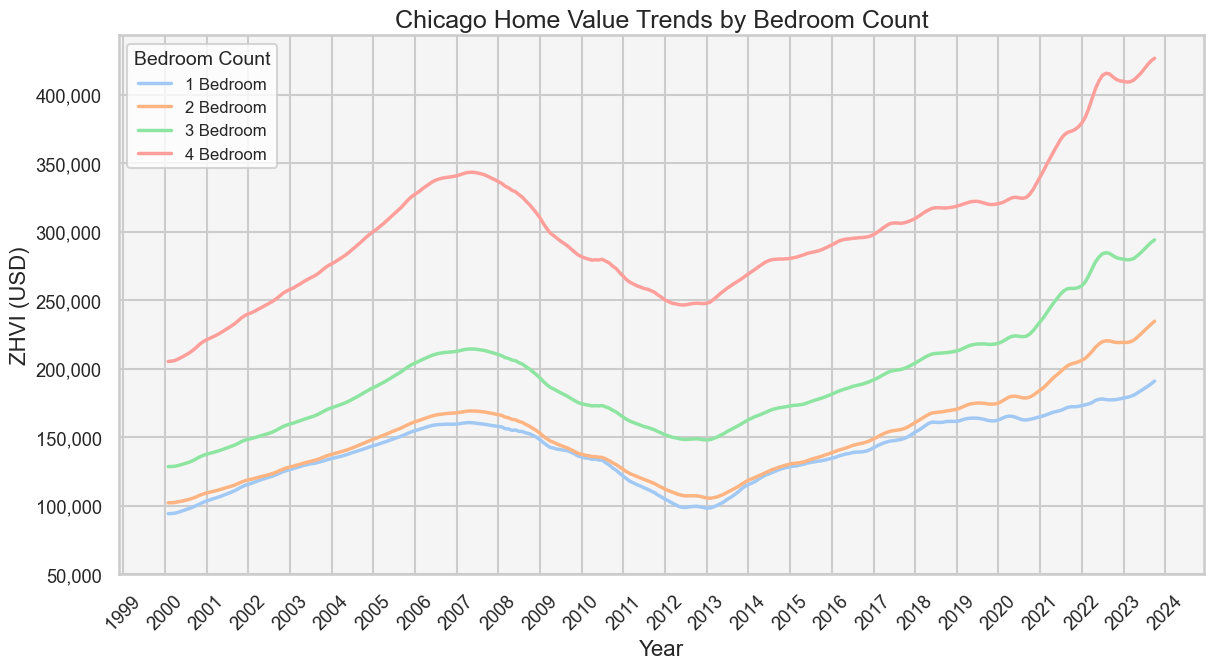

In [12]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import pandas as pd
import numpy as np

# Load your data into pandas DataFrames from CSV files
one_bed = pd.read_csv('datasets\Metro_zhvi_bdrmcnt_1_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv')
two_bed = pd.read_csv('datasets\Metro_zhvi_bdrmcnt_2_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv')
three_bed = pd.read_csv('datasets\Metro_zhvi_bdrmcnt_3_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv')
four_bed = pd.read_csv('datasets\Metro_zhvi_bdrmcnt_4_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv')

chicago_one = one_bed[one_bed['RegionName'] == 'Chicago, IL']
chicago_one_from_2000_to_end = chicago_one.iloc[0][one_bed.columns.get_loc('2000-01-31'):]
chicago_two = two_bed[two_bed['RegionName'] == 'Chicago, IL']
chicago_two_from_2000_to_end = chicago_two.iloc[0][two_bed.columns.get_loc('2000-01-31'):]
chicago_three = three_bed[three_bed['RegionName'] == 'Chicago, IL']
chicago_three_from_2000_to_end = chicago_three.iloc[0][three_bed.columns.get_loc('2000-01-31'):]
chicago_four = four_bed[four_bed['RegionName'] == 'Chicago, IL']
chicago_four_from_2000_to_end = chicago_four.iloc[0][four_bed.columns.get_loc('2000-01-31'):]

# Increase default font size and line width for better readability
sns.set_context('talk', font_scale=0.8)

# Set the Seaborn theme
sns.set_style('whitegrid')
sns.set_palette('pastel')

# Create the figure and the line plot
plt.figure(figsize=(14, 7))

# Plot the data for each bedroom type
for df, label in [(chicago_one_from_2000_to_end, '1 Bedroom'),
                 (chicago_two_from_2000_to_end, '2 Bedroom'),
                 (chicago_three_from_2000_to_end, '3 Bedroom'),
                 (chicago_four_from_2000_to_end, '4 Bedroom')]:

    # Convert index to datetime
    dates = pd.to_datetime(df.index)

    # Plot with Seaborn
    sns.lineplot(x=dates, y=df.values, label=label, linewidth=2.5)

# Set the x-axis to display years only
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Set y-axis limits and labels
plt.ylim(50000, plt.gca().get_ylim()[1]) # Set minimum y-value to 50000 and maximum to auto
y_max = int(plt.gca().get_ylim()[1] // 50000 * 50000) # Find the nearest number less than max that is divisible by 50000
if y_max < plt.gca().get_ylim()[1]: # If the max y-value is not a multiple of 50000, add another step
    y_max += 50000
plt.yticks(np.arange(50000, y_max, 50000))

# Format the y-axis labels to include commas for thousands
plt.gca().get_yaxis().set_major_formatter(plt.matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Set plot title and labels
plt.title('Chicago Home Value Trends by Bedroom Count', fontsize=18)
plt.xlabel('Year', fontsize=16)
plt.ylabel('ZHVI (USD)', fontsize=16)

# Show legend with a title and increase its font size
plt.legend(title='Bedroom Count', title_fontsize='14', fontsize='12', loc='upper left')

# Set the background color
plt.gca().set_facecolor('#f5f5f5')

# Show the plot
plt.show()

### Explanation
If we look at the graph, the ZHVI of properties with 4 bedrooms seems drastically higher (approx. $75k) than properties with lesser bedrooms. Although, if we look closely, all four lines seems to be changing at approximately the same rate. Even though the ZHVI with 4 bedrooms is higher, the rate is more or less is same as others. So our hypothesis is wrong and disproved from the above visualization. We learn that properties with 4 bedrooms have higher ZHVI, but their rate of change in ZHVI is approximately the same (hence not higher) than the rate of change in ZHVI of properties with lesser bedrooms.

# ML Analysis (needed at least 2)

## ML Analysis 1 (Devesh)
### ML Use Case
Develop a predictive model that forecasts home values (ZHVI) based on various features such as location, home size, number of bedrooms, and historical trends. This is a regression problem where the target variable is continuous.

In [18]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
zhvi_data = pd.read_csv("datasets\Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")

# Impute missing values using the median
imputer = SimpleImputer(strategy='median')
model_data_numeric = zhvi_data.select_dtypes(include=[np.number])  # Select only numeric columns
model_data_imputed = imputer.fit_transform(model_data_numeric)
model_data_imputed_df = pd.DataFrame(model_data_imputed, columns=model_data_numeric.columns)

# Prepare the historical ZHVI data for modeling
# We'll use the past 12 months of ZHVI values as features to predict the next month's ZHVI value
X = model_data_imputed_df.iloc[:, :-13].values
y = model_data_imputed_df.iloc[:, -13].values  # We use -13 to predict the ZHVI 12 months ahead

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Gradient Boosting Regressor model
gbr = GradientBoostingRegressor()

# Train the model on the scaled dataset
gbr.fit(X_train_scaled, y_train)

# Predict the ZHVI values on the test set using the trained model
y_pred_gbr = gbr.predict(X_test_scaled)

# Evaluate the model using the test set
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
r2_gbr = r2_score(y_test, y_pred_gbr)

print("Mean Absolute Error:", mae_gbr)
print("Mean Squared Error:", rmse_gbr)
print("r2_gbr:", r2_gbr)

Mean Absolute Error: 6463.183862710046
Mean Squared Error: 41342.57759525181
r2_gbr: 0.9536895212773102


## ML Analysis 2 (Arpan)
### ML Use Case
Classify regional housing markets as "hot," "stable," or "cold" based on current market indicators such as Days to Pending, Inventory Levels, Sale-to-List Ratio, and historical ZHVI trends. This is a classification problem where the target variable is categorical.

#### 1. Data Acquisition

In [14]:
# Import necessary libraries
import pandas as pd

# Would be looking at four features specifically
# [Days_to_Pending, Inventory_Levels, Sale_to_List_Ratio, ZHVI_Trends, Market_Temperature (Target/Label)]
days_to_pending = pd.read_csv("datasets\Metro_med_doz_pending_uc_sfrcondo_sm_month.csv")
inventory_levels = pd.read_csv("datasets\Metro_invt_fs_uc_sfrcondo_sm_month.csv")
sale_to_list_ratio = pd.read_csv("datasets\Metro_median_sale_to_list_uc_sfrcondo_sm_month.csv")
zhvi_trends = pd.read_csv("datasets\Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")
sales_count = pd.read_csv("datasets\Metro_sales_count_now_uc_sfrcondo_month.csv")

#### 2. Data Cleaning

In [15]:
# Would be cleaning out data and making it balanced.
# Firstly considering the same time for data.
# ZHVI has more data than other data sets. So we would be not considering a lot of columns from that dataframe.
# We want to consider data from '2018-03-31' to '2023-09-30' (Undersampling)
# inventory_levels end at '2023'08'31', so need to impute values for that column
date_range = pd.date_range(start='2018-03-31', end='2023-09-30', freq='M')

# Cleaning days_to_pending
days_to_pending = days_to_pending.drop('SizeRank', axis=1)
days_to_pending = days_to_pending[days_to_pending['RegionName'] != 'United States']
# print("days_to_pending")
# print(days_to_pending.columns)  # all columns (allegedly across all dataframes)

# Cleaning inventory_levels
inventory_levels = inventory_levels.drop('SizeRank', axis=1)
inventory_levels = inventory_levels[inventory_levels['RegionName'] != 'United States']
# Imputing data in inventory_levels
# Calculate the median of the existing values in the DataFrame for the '2023-09-30' column
column_index_i_l = inventory_levels.columns.get_loc('2018-03-31') # Find the index of the '2018-03-31' column
median_value = inventory_levels.iloc[:, column_index_i_l:-1].median(axis=1)  # column_index_i_l represents the index of the '2018-03-31' column
inventory_levels['2023-09-30'] = median_value  # Add the '2023-09-30' column and impute placeholder values (e.g., 0) for now
# print(days_to_pending.columns == inventory_levels.columns) # [... True ...]

# Cleaning sale_to_list_ratio
sale_to_list_ratio = sale_to_list_ratio.drop('SizeRank', axis=1)
sale_to_list_ratio = sale_to_list_ratio[sale_to_list_ratio['RegionName'] != 'United States']
# Imputing data in sale_to_list_ratio
# Calculate the median of the existing values in the DataFrame for the '2023-09-30' column
column_index_s_t_l = sale_to_list_ratio.columns.get_loc('2018-03-31') # Find the index of the '2018-03-31' column
median_value = sale_to_list_ratio.iloc[:, column_index_s_t_l:-1].median(axis=1)  # column_index_s_t_l represents the index of the '2018-03-31' column
sale_to_list_ratio['2023-09-30'] = median_value  # Add the '2023-09-30' column and impute placeholder values (e.g., 0) for now
# print("\nsale_to_list_ratio")
# print(inventory_levels.columns == sale_to_list_ratio.columns)  # [... True ...]

# Cleaning zhvi_trends
zhvi_trends = zhvi_trends.drop('SizeRank', axis=1)
zhvi_trends = zhvi_trends[zhvi_trends['RegionName'] != 'United States']
zhvi_trends = zhvi_trends[['RegionID', 'RegionName', 'RegionType', 'StateName'] + date_range.strftime('%Y-%m-%d').tolist()]
# print("\nzhvi_trends")
# print(sale_to_list_ratio.columns == zhvi_trends.columns)  # [... True ...]

# Cleaning sales_count
sales_count = sales_count.drop('SizeRank', axis=1)
sales_count = sales_count[sales_count['RegionName'] != 'United States']
sales_count = sales_count[['RegionID', 'RegionName', 'RegionType', 'StateName'] + date_range.strftime('%Y-%m-%d').tolist()]
# print(zhvi_trends.columns == sales_count.columns)  # [... True ...]

#### 3. Data Processing
Creating another dataframe market_temperature which would be our Target label market temperature determines whether the market is hot/stable/cold. In real world it is based on a lot of features, but for this project we are only considering two features to determine market temperature: sales count and inventory levels.

$ market\_temperature = sales\_count / inventory\_levels $

* If low inventory yet more sales, implies there's more demand in the market, hence the market is 'hot'.
* If moderate inventory and moderate sales, implies the market is 'stable'.
* If high inventory yet less sales, implies there's less demand in the market, hence the market is'cold'

In [16]:
# Now that we have sales_count and inventory_levels, we can create market_temperature
# Define the common columns for merging
common_columns = ['RegionID', 'RegionName', 'RegionType', 'StateName']

# Merge the dataframes on the common columns
market_temperature = pd.merge(sales_count, inventory_levels, on=common_columns, suffixes=('_sales', '_inventory'))

# Iterate over the date columns to calculate market temperature
for column in sales_count.columns.difference(common_columns):
    market_temperature[column] = market_temperature[f"{column}_sales"] / market_temperature[f"{column}_inventory"]

# Drop the redundant columns
market_temperature = market_temperature.drop(market_temperature.filter(like='_sales').columns, axis=1)
market_temperature = market_temperature.drop(market_temperature.filter(like='_inventory').columns, axis=1)

# Now we have the market_temperature in values
# market_temperature.head(5)

# Define the mapping function
def map_to_category(value):
    if pd.notna(value):
        if value <= 0.333333:
            return 'cold'
        elif value <= 0.666666:
            return 'stable'
        else:
            return 'hot'
    return value

# Apply the mapping function to convert decimal values to categories
market_temperature_categorical = market_temperature.copy()
market_temperature_categorical.iloc[:, 4:] = market_temperature.iloc[:, 4:].apply(lambda x: x.map(map_to_category))

#### 4. Machine Learning (Decision Tree)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Features: [Days_to_Pending, Inventory_Levels, Sale_to_List_Ratio, ZHVI_Trends]
X = market_temperature[['2018-03-31', '2018-04-30', '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
                        '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31', '2019-01-31', '2019-02-28',
                        '2019-03-31', '2019-04-30', '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
                        '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31', '2020-02-29',
                        '2020-03-31', '2020-04-30', '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
                        '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31', '2021-01-31', '2021-02-28',
                        '2021-03-31', '2021-04-30', '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31',
                        '2021-09-30', '2021-10-31', '2021-11-30', '2021-12-31', '2022-01-31', '2022-02-28',
                        '2022-03-31', '2022-04-30', '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31',
                        '2022-09-30', '2022-10-31', '2022-11-30', '2022-12-31', '2023-01-31', '2023-02-28',
                        '2023-03-31', '2023-04-30', '2023-05-31', '2023-06-30', '2023-07-31', '2023-08-31',
                        '2023-09-30']]

# Target variable: Market_Temperature (categorical)
y = market_temperature_categorical['2023-09-30']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

        cold       1.00      1.00      1.00        22
      stable       1.00      1.00      1.00         1

    accuracy                           1.00        23
   macro avg       1.00      1.00      1.00        23
weighted avg       1.00      1.00      1.00        23



# Reflection

### 1. What is the most challenging part of the project that you’ve encountered so far?

In terms of engineering the machine learning part was most difficult, mostly because the data is multi-modal and multi-dimensional. Furthermore, there was a significant imbalance in data. ZHVI had more time-span of data than others, which made us undersample to focus on the common time. Furthermore, we also had to do data imputation as some datasets did not have a 09/30/2023 column, especially for machine learning to have balanced data. Lastly, once we processed the data, training the model on this complex architecture of datasets was hard.

### 2. What are your initial insights?

Initally, we had a very different project, and to us it seemed very practical. While we are saddened by not finding enough data for that, this idea was really insightful as well. We had lots of data, which enabled us to independently research our own interests within the realm of real-estate market.

### 3. Are there any concrete results you can show at this point? If not, why not?

Almost everything in this progress report is concrete, except for Arpan's machine learning. While it works, we believe it can be further improved to consider all the features to classify market temperature. Once it works accurately as a classifier, we can even make it interactive by providing bunch of features and the model outputs whether the market is hot/stable/cold. Intuitively, this can also be used as a prediction if we enter predicted features, and the model's classification in which case would also be a prediction technically.

### 4. Going forward, what are the current biggest problems you’re facing?

Figuring out a way to create a single point of data with all this different datasets. The architecture of this datasets is very complex which makes merging these datasets into one harder. We had initial ideas of how to merge, but it proved to complex to finish by this project report. We would try and see if we can get that done by final submission. If we get that done, we would have even more advanced machine learning model which would be a very effective and powerful classifier.

### 5. Do you think you are on track with your project? If not, what parts do you need to dedicate more time to?

I think we are on track. We accomplished most of the tasks we setup for ourselves, at least achieved it. Moving forward we would work on perfecting it.

### 6. Given your initial exploration of the data, is it worth proceeding with your project, why? If not, how will you move forward (method, data etc)?

Yes, this current (new) project idea is definitely worth proceeding. The visualizations are something that property managers actually consider an important insight for their trade. Furthermore, our main goal is to get the machine learning model working. Given the data, the practicality of this idea and our solutions and insights, this project is worth a lot.

# Next Step
1. Making more visually pleasing visualizations.
2. Try to figure out a better way to visualize. Maybe instead of yearly, try to plot the values over a cycle of six months, or even one month.
3. Figure out a way to merge all this data into a single dataset.
4. Once 3. is done, figure out how to train a model with that much data.